In [1]:
WORKING_DIR = 'D:/Assignments/공모전/dacon/TVControlHandGestureRecognition' # 각자의 환경에 맞게 Working Directory 경로 수정
DATA_PATH = 'dataset/'
TRAIN_CSV = 'train.csv'

In [2]:
import os

if not os.path.isdir(WORKING_DIR):
    print('Working Directory를 입력하세요.')
    WORKING_DIR = input()

os.chdir(WORKING_DIR)
os.getcwd()

'D:\\Assignments\\공모전\\dacon\\TVControlHandGestureRecognition'

In [3]:
import pandas as pd

train_df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_CSV))
train_df.head()

,id,path,label
0,TRAIN_000,./train/TRAIN_000.mp4,3
1,TRAIN_001,./train/TRAIN_001.mp4,0
2,TRAIN_002,./train/TRAIN_002.mp4,1
3,TRAIN_003,./train/TRAIN_003.mp4,4
4,TRAIN_004,./train/TRAIN_004.mp4,4


# 데이터 불균형 확인

In [4]:
train_df.label.count()

610

In [5]:
train_df.label.value_counts()

3    133
1    129
2    121
4    114
0    113
Name: label, dtype: int64

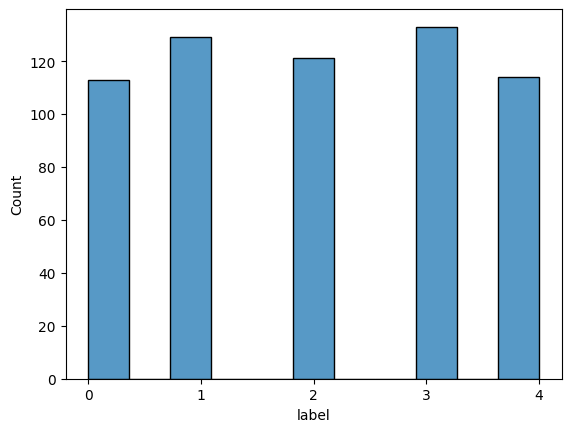

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='label',data=train_df,)
plt.xticks([i for i in range(5)])
plt.show()

# 비디오 데이터 확인

In [7]:
import cv2

video_df = train_df.copy()

- CAP_PROP_FRAME_WIDTH: 프레임 너비
- CAP_PROP_FRAME_HEIGHT: 프레임 높이
- CAP_PROP_FPS: Frame 속도
- CAP_PROP_FRAME_COUNT: 총 프레임 개수

In [8]:
width = []
height = []
fps = []
frame_count = []

for _, row in video_df.iterrows():
    video_path = os.path.join(WORKING_DIR, DATA_PATH, row['path'])
    video = cv2.VideoCapture(video_path)

    width.append(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height.append(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps.append(video.get(cv2.CAP_PROP_FPS))
    frame_count.append(video.get(cv2.CAP_PROP_FRAME_COUNT))

In [9]:
video_df['width'] = width
video_df['height'] = height
video_df['width_height'] = video_df[['width', 'height']].apply(tuple, axis=1)
video_df['fps'] = fps
video_df['frame_count'] = frame_count

In [10]:
video_df.head()

,id,path,label,width,height,width_height,fps,frame_count
0,TRAIN_000,./train/TRAIN_000.mp4,3,160.0,120.0,"(160.0, 120.0)",30.0,30.0
1,TRAIN_001,./train/TRAIN_001.mp4,0,160.0,120.0,"(160.0, 120.0)",30.0,30.0
2,TRAIN_002,./train/TRAIN_002.mp4,1,160.0,120.0,"(160.0, 120.0)",30.0,30.0
3,TRAIN_003,./train/TRAIN_003.mp4,4,360.0,360.0,"(360.0, 360.0)",30.0,30.0
4,TRAIN_004,./train/TRAIN_004.mp4,4,360.0,360.0,"(360.0, 360.0)",30.0,30.0


In [11]:
video_df.fps.value_counts()

30.0    610
Name: fps, dtype: int64

In [12]:
video_df.frame_count.value_counts()

30.0    610
Name: frame_count, dtype: int64

In [13]:
video_df.width_height.value_counts()

(160.0, 120.0)    431
(360.0, 360.0)    179
Name: width_height, dtype: int64

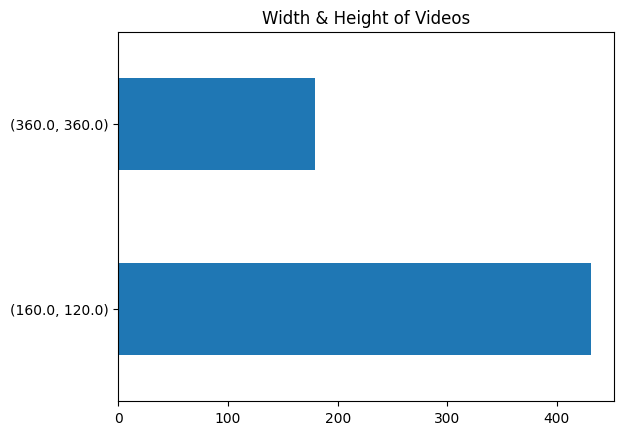

In [14]:
video_df.width_height.value_counts().plot(kind='barh')
plt.title('Width & Height of Videos')
plt.show()